# What is a Support Vector Machine?
It's a supervised machine learning algorithm which can be used for both classification or regression problems. It's usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

# Support Vectors
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM.

<img src="support_vectors.jpg" width=500px>

# Hyperplane
Hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

<img src="hyperplane.jpg" width=500px>

# Linear vs nonlinear classification?
Sometimes our data is linearly seperable. That means for N classes with M features, we can learn a mapping that is a linear combination. (like y = mx + b). Or even a multidimensional hyperplane (y = x + z + b + q). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes its not. Like if there was a quadratic mapping. Luckily for us SVMs can can efficiently perform a non-linear classification using what is called the kernel trick. 

# Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [31]:
### Sepal length and width
X = iris.data[:,:2]
y = iris.target

In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

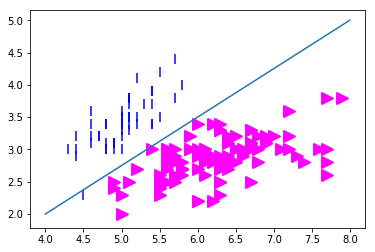

In [33]:
for i, flower in enumerate(X):
    # Plot the negative samples (the first 2)
    if y[i] == 0:
        plt.scatter(flower[0], flower[1], c='blue', s=120, marker='|', linewidths=2)
    # Plot the positive samples (the last 3)
    #elif y[i] == 1:
    #    plt.scatter(flower[0], flower[1], c='black', s=120, marker='o', linewidths=2)
    else:
        plt.scatter(flower[0], flower[1], c='magenta', s=120, marker='>', linewidths=2)
plt.plot([4,8],[2,5])         

In [34]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

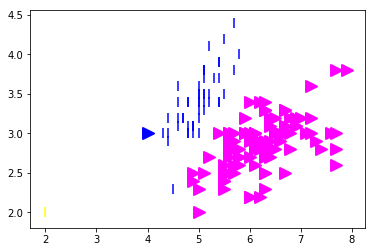

In [35]:
for i, flower in enumerate(X):
    # Plot the negative samples (the first 2)
    if y[i] == 0:
        plt.scatter(flower[0], flower[1], c='blue', s=120, marker='|', linewidths=2)
    # Plot the positive samples (the last 3)
    #elif y[i] == 1:
    #    plt.scatter(flower[0], flower[1], c='black', s=120, marker='o', linewidths=2)
    else:
        plt.scatter(flower[0], flower[1], c='magenta', s=120, marker='>', linewidths=2)
        
# Add our test samples
plt.scatter(2,2, s=120, marker='|', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='>', linewidths=2, color='blue')


D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


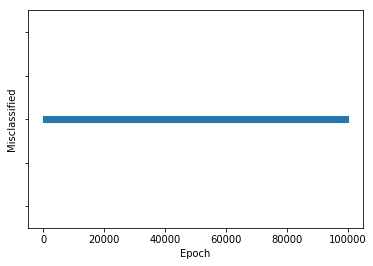

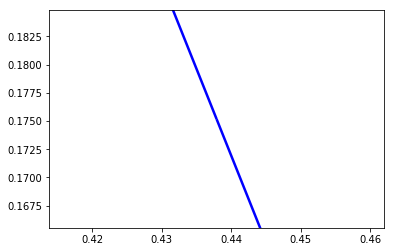

In [22]:
w  = svm_sgd_plot(X,y)

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')